# Pymaceuticals Inc.
---

### Analysis

Some analysis that can be made from the data below are as followed
1) There seems to be a definte positive correlation between the weight of a mouse and its tumor size
   meaning as the weight of the mouse increases so does its tumor size.
   
2) Capumolin seems to be a very effective treatment regimen. According to the dat it take about 
   20 days for the drug to kick in but once it does the tumor shrint by 8mm within 15 days.
   
3) The two main common treatments are Ramicane and Capumolin.
   
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_complete= pd.merge(mouse_metadata,study_results, how="outer", on= "Mouse ID")

# Display the data table for preview
data_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mice_count=data_complete["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=data_complete.loc[data_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_data=data_complete.loc[data_complete["Mouse ID"]=='g989',:]
dup_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data= data_complete[data_complete['Mouse ID'] !='g989']
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_id=clean_data["Mouse ID"].nunique()
clean_mice_id


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary= pd.DataFrame({"Mean Tumor Volume": mean,
                       "Median Tumor volume": median,
                       "Tumor Volume Variance": var,
                       "Tumor Volume Std Dev" : std,
                       "Tumor Volume Std. Err" : sem})

summary

,Mean Tumor Volume,Median Tumor volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

summary_agg= clean_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mice per Treatment')

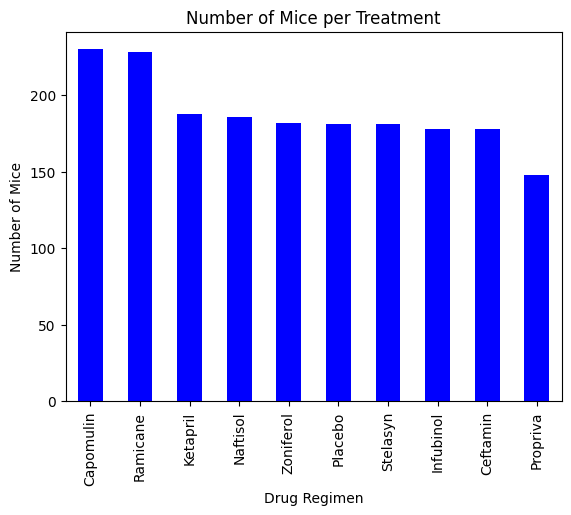

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_per_drug = clean_data["Drug Regimen"].value_counts()

plot_pandas = count_per_drug.plot.bar(color='b')  
# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")

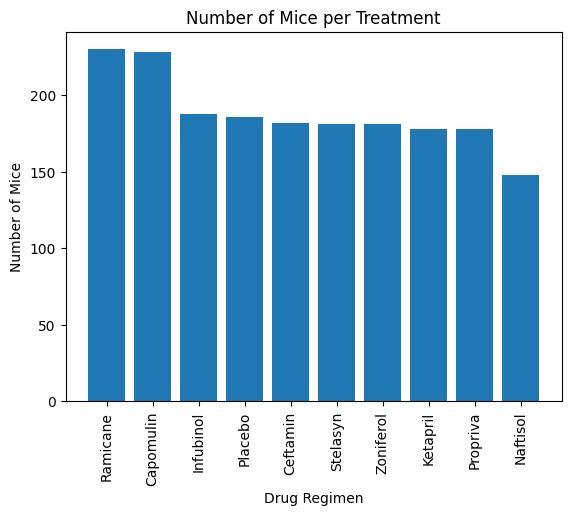

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis= clean_data["Drug Regimen"].unique()
y_axis=  clean_data["Drug Regimen"].value_counts()

plt.bar(x_axis,y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice per Treatment")
plt.xticks(rotation="vertical")
plt.show()

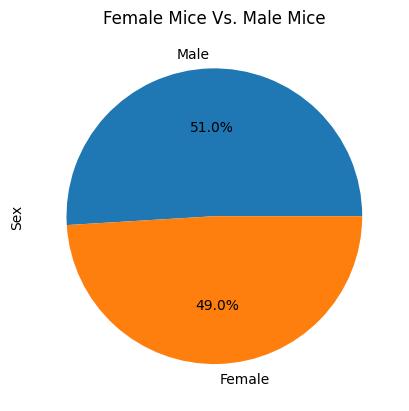

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data= clean_data["Sex"].value_counts()

gender_data.plot.pie(autopct= "%1.1f%%")
plt.title ("Female Mice Vs. Male Mice")
plt.show()

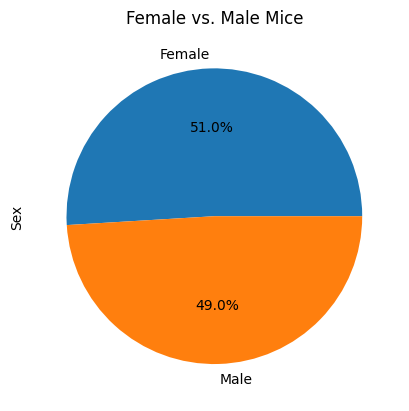

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y=gender_data
labels = ['Female', 'Male']
plt.pie(y, labels=labels, autopct="%1.1f%%")
plt.title("Female vs. Male Mice")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]
Ramicane_data = clean_data.loc[clean_data["Drug Regimen"] == "Ramicane", :]
Infubinol_data = clean_data.loc[clean_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_data = clean_data.loc[clean_data["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = data_complete.groupby("Mouse ID")
last_timepoint = last_timepoint["Timepoint"].max()
last_timepoint_data = pd.DataFrame(last_timepoint)
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume = pd.merge(last_timepoint_data, data_complete, on = ["Mouse ID","Timepoint"])
tumor_volume.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [14]:

tumor_vol_capomulin = []
tumor_vol_ramicane = []
tumor_vol_infubinol = []
tumor_vol_ceftamin = []
# Put four tumor vol lists into a list for for loop
tumor_vol = [tumor_vol_capomulin, tumor_vol_ramicane, tumor_vol_infubinol, tumor_vol_ceftamin]
    
for i in range(len(tumor_volume)-1):
    if tumor_volume.loc[i, "Drug Regimen"] == "Capomulin":
        tumor_vol_capomulin.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume.loc[i, "Drug Regimen"] == "Ramicane":
        tumor_vol_ramicane.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume.loc[i, "Drug Regimen"] == "Infubinol":
        tumor_vol_infubinol.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])
    if tumor_volume.loc[i, "Drug Regimen"] == "Ceftamin":
        tumor_vol_ceftamin.append(tumor_volume.loc[i, "Tumor Volume (mm3)"])

# Put treatments into a list for for loop (and later for plot labels)
treatments= ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
outlier_list = [] # Locate the rows which contain mice on each drug and get the tumor volumes

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatments in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    mice_per_drug=tumor_volume.loc[tumor_volume["Drug Regimen"]==treatments, 'Tumor Volume (mm3)']
    # add subset
    outlier_list.append(mice_per_drug)
    
    # Determine outliers using upper and lower bounds
    quartiles = mice_per_drug.quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    outlier= mice_per_drug.loc[(mice_per_drug<lower_bound) | (mice_per_drug>upper_bound)]
    print(f'{treatments} potential outliers: {outlier}')

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


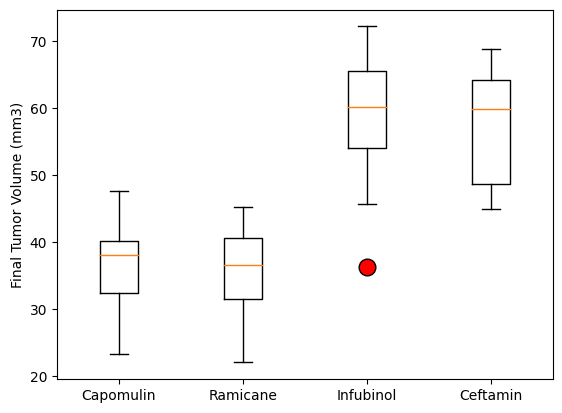

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
#data_to_plot=data_to_plot.values
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', linewidth= 4, markeredgecolor='black')
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels=Regimen, flierprops= flierprops, widths = 0.3, vert=True)
plt.show()

## Line and Scatter Plots

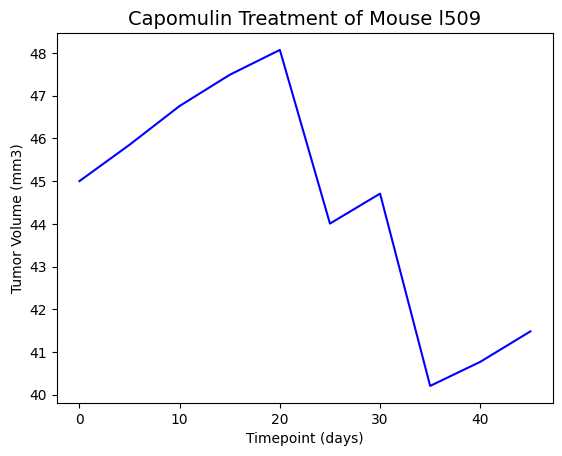

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
tumor_volume.loc[tumor_volume["Drug Regimen"] == "Capomulin"].head()
mousel509=clean_data[clean_data["Mouse ID"]=='l509']

plt.plot(mousel509["Timepoint"],mousel509["Tumor Volume (mm3)"], color = "blue")
plt.title("Capomulin Treatment of Mouse l509", fontsize = 14)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

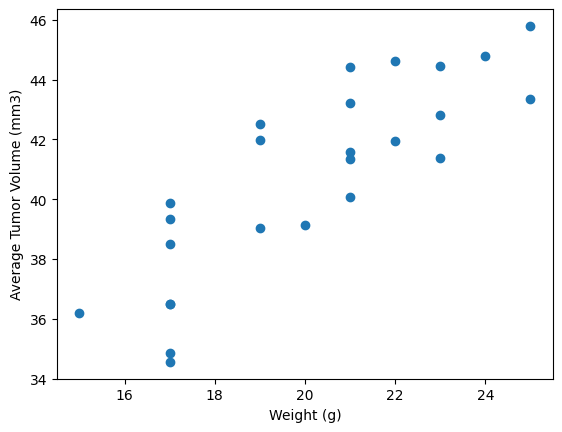

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = clean_data.loc[clean_data["Drug Regimen"]=="Capomulin"].groupby("Mouse ID")
average_tumor_capomulin = capomulin_data["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data["Weight (g)"].unique()
plt.scatter(mouse_weight, average_tumor_capomulin)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


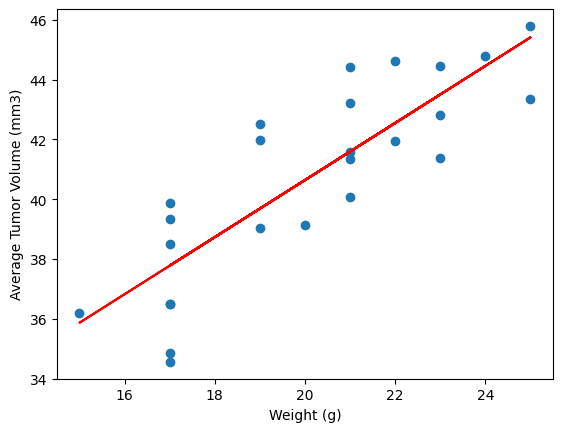

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
mouse_weight = mouse_weight.astype(float)
correlation = st.pearsonr(mouse_weight, average_tumor_capomulin)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, average_tumor_capomulin)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(mouse_weight, average_tumor_capomulin)
plt.plot(mouse_weight,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")
plt.show()